# Review Changes
### 1. Resolve minor issue in exploration notebook
   -Removed unneed variable and add in definition of undefined variables (the variables were defined before but I moved the sequence of cells so it became undefined)

### 2. Include a readme file in your submission (it is a submission requirement)
    - Included 
    
### 3.The submission requirements require a slide show notebook to be included in your submission.
    - Updated

### 4. A slide show HTML file is a submission requirement (the file named slide show is not in slide show format).
    - Updated
    
### 5. As can be seen in the gif above, some visualizations don't have titles. Others have python messages printed to them.
    - Titles added

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import glob
import os

## Load and check the data

In [2]:
#Load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.tail(45)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183367,295,2019-02-01 01:13:45.2760,2019-02-01 01:18:41.2670,338.0,13th St at Franklin St,37.803189,-122.270579,372.0,Madison St at 17th St,37.804037,-122.262409,1448,Subscriber,1981.0,Male,No
183368,449,2019-02-01 01:10:32.3990,2019-02-01 01:18:01.8870,364.0,China Basin St at 3rd St,37.772000,-122.389970,27.0,Beale St at Harrison St,37.788059,-122.391865,5275,Subscriber,1995.0,Male,No
183369,537,2019-02-01 01:05:08.5690,2019-02-01 01:14:05.9230,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,241.0,Ashby BART Station,37.852477,-122.270213,15,Subscriber,1982.0,Female,No
183370,612,2019-02-01 01:03:45.9080,2019-02-01 01:13:58.6060,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,241.0,Ashby BART Station,37.852477,-122.270213,414,Subscriber,1982.0,Female,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No
183372,1409,2019-02-01 00:47:33.3580,2019-02-01 01:11:02.4430,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,150.0,Adeline St at 40th St,37.831277,-122.278267,3615,Subscriber,1989.0,Male,No
183373,954,2019-02-01 00:54:08.9600,2019-02-01 01:10:03.8690,11.0,Davis St at Jackson St,37.797280,-122.398436,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,545,Subscriber,1974.0,Male,Yes
183374,258,2019-02-01 01:03:40.5190,2019-02-01 01:07:59.2200,316.0,San Salvador St at 1st St,37.330165,-121.885831,297.0,Locust St at Grant St,37.322980,-121.887931,3778,Subscriber,1976.0,Female,Yes
183375,151,2019-02-01 01:04:57.2010,2019-02-01 01:07:28.8100,19.0,Post St at Kearny St,37.788975,-122.403452,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1984.0,Male,No
183376,728,2019-02-01 00:54:18.5040,2019-02-01 01:06:27.1060,368.0,Myrtle St at Polk St,37.785434,-122.419622,91.0,Berry St at King St,37.771762,-122.398438,4974,Subscriber,1990.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape

(183412, 16)

In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.bike_id.unique().sum()

16457647

In [10]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

## Data wrangling

1. Change the data type for time 
2. Get rid of null data
3. Add in columns, duration, time and age, for later analysis  
4. Get rid of abnormal age points

##### 1. Change the time to date_time objects, change user_type as category

In [11]:
#make a copy of the dataframe
df_c1=df.copy()

df_c1.start_time=pd.to_datetime(df_c1.start_time)
df_c1.end_time=pd.to_datetime(df_c1.end_time)

df_c1.user_type=df_c1.user_type.astype('category')

In [12]:
#test
df_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

##### 2. Remove the 197 null object in start_id and so on. Remove the 8263 data that don't have gender value and birthyear

In [13]:
df_c2=df_c1.copy()
df_c2=df_c2[df_c2["start_station_id"].isnull()==False]
df_c2=df_c2[df_c2["member_birth_year"].isnull()==False]
#df_c2['start_station_id'] = df['start_station_id'].replace('-', np.nan)
#df_c2 = df_c2.dropna(axis=0, subset=['start_station_id'])

In [14]:
#test
df_c2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

##### 3. Add columns for Time, Month, Duration_min

In [15]:
df_c3=df_c2.copy()

In [16]:
df_c3['duration_min']=df_c3["duration_sec"]/60
df_c3['duration_min']=df_c3['duration_min'].astype('int')

df_c3['Time of day']=df_c3.start_time.dt.strftime('%H')
df_c3['Month']=df_c3.start_time.dt.strftime('%B')
df_c3['Weekday']=df_c3.start_time.dt.strftime('%a')

df_c3['Age']=2020-df_c3['member_birth_year']

In [17]:
#test
df_c3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,Time of day,Month,Weekday,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869,17,February,Thu,36.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030,12,February,Thu,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608,17,February,Thu,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26,23,February,Thu,46.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,29,23,February,Thu,61.0


##### 4. Check and get rid of abnormal point in age, if any

(array([7.4267e+04, 6.9344e+04, 2.2265e+04, 8.0440e+03, 8.2900e+02,
        1.2700e+02, 4.0000e+00, 1.0000e+00, 7.0000e+01, 1.0000e+00]),
 array([ 19. ,  31.3,  43.6,  55.9,  68.2,  80.5,  92.8, 105.1, 117.4,
        129.7, 142. ]),
 <a list of 10 Patch objects>)

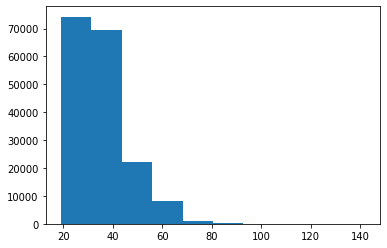

In [18]:
plt.hist(df_c3['Age'])

In [19]:
max(df_c3['Age'])

142.0

In [20]:
min(df_c3['Age'])

19.0

In [21]:
df_c4=df_c3.copy()
df_c4=df_c4[df_c4['Age']<=90]

In [22]:
#test
max(df_c4['Age'])

90.0

In [23]:
df_c4.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,Time of day,Month,Weekday,Age
62061,692,2019-02-20 17:11:09.223,2019-02-20 17:22:42.004,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,141.0,Valencia St at Cesar Chavez St,37.747998,...,5968,Subscriber,1985.0,Male,No,11,17,February,Wed,35.0
128454,514,2019-02-10 13:12:35.392,2019-02-10 13:21:09.578,187.0,Jack London Square,37.796248,-122.279352,201.0,10th St at Fallon St,37.797673,...,4505,Subscriber,1967.0,Male,No,8,13,February,Sun,53.0
144498,418,2019-02-07 12:04:41.739,2019-02-07 12:11:40.453,223.0,16th St Mission BART Station 2,37.764765,-122.420091,90.0,Townsend St at 7th St,37.771058,...,4651,Subscriber,1986.0,Male,No,6,12,February,Thu,34.0
59231,1235,2019-02-20 20:36:25.774,2019-02-20 20:57:01.598,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,4336,Customer,1965.0,Male,No,20,20,February,Wed,55.0
149356,551,2019-02-06 19:25:38.684,2019-02-06 19:34:50.326,167.0,College Ave at Harwood Ave,37.848152,-122.252160,268.0,Ellsworth St at Russell St,37.857490,...,703,Subscriber,1995.0,Male,No,9,19,February,Wed,25.0
136663,768,2019-02-08 09:24:38.406,2019-02-08 09:37:26.448,125.0,20th St at Bryant St,37.759200,-122.409851,62.0,Victoria Manalo Draves Park,37.777791,...,611,Subscriber,1985.0,Male,No,12,09,February,Fri,35.0


In [24]:
df_c4.shape

(174875, 21)

In [25]:
df_c4.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'Time of day', 'Month', 'Weekday', 'Age'],
      dtype='object')

In [26]:
df_c4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174875 non-null  int64         
 1   start_time               174875 non-null  datetime64[ns]
 2   end_time                 174875 non-null  datetime64[ns]
 3   start_station_id         174875 non-null  float64       
 4   start_station_name       174875 non-null  object        
 5   start_station_latitude   174875 non-null  float64       
 6   start_station_longitude  174875 non-null  float64       
 7   end_station_id           174875 non-null  float64       
 8   end_station_name         174875 non-null  object        
 9   end_station_latitude     174875 non-null  float64       
 10  end_station_longitude    174875 non-null  float64       
 11  bike_id                  174875 non-null  int64         
 12  user_type       

In [27]:
#save as csv
df_c4.to_csv('bike_clean.csv', 
                 index=False, encoding = 'utf-8')

In [28]:
df_final = pd.read_csv('./bike_clean.csv')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174875 entries, 0 to 174874
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174875 non-null  int64  
 1   start_time               174875 non-null  object 
 2   end_time                 174875 non-null  object 
 3   start_station_id         174875 non-null  float64
 4   start_station_name       174875 non-null  object 
 5   start_station_latitude   174875 non-null  float64
 6   start_station_longitude  174875 non-null  float64
 7   end_station_id           174875 non-null  float64
 8   end_station_name         174875 non-null  object 
 9   end_station_latitude     174875 non-null  float64
 10  end_station_longitude    174875 non-null  float64
 11  bike_id                  174875 non-null  int64  
 12  user_type                174875 non-null  object 
 13  member_birth_year        174875 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset now has 20 columns (features) and 174875 records. The 20 features can be further divided into 3 large classes:

1. Trip time details: 'duration_sec', 'start_time', 'end_time','duration_min', 'Time of day', 'Month'
2. Station details: 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude',        'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude'
3. User information: 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Age','bike_id'


### What is/are the main feature(s) of interest in your dataset?¶
The main features are the time information of trip and it's link with the user pattern.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For trip time details, 'duration_min', 'Time of day', 'Month' will be helpful in answering questions such as: When are most trips taken in terms of time of day? How long does the average trip take?
For user pattern, 'user_type', 'member_gender', 'bike_share_for_all_trip', 'Age' will support the investigation

## Univariate Exploration


Explore the duration and timing of trips:
How long does the average trip take? What is the longest duration? How does the distribution of trips look like?

In [29]:
# Average duration of trip
sum(df_c4.duration_min)/len(df_c4.duration_min)

11.241869907076483

In [30]:
# longest duration of trip
max(df_c4.duration_min)

1409

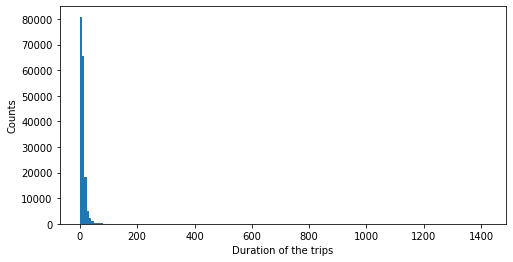

In [31]:
# plot histogram to check the distribution of durations
import matplotlib.pyplot as plt
binsize = 8
bins = np.arange(0, df_c4['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 4])

plt.hist(data = df_c4, x = 'duration_min', bins=bins);


plt.xlabel('Duration of the trips');
plt.ylabel('Counts');

In [32]:
df_c4['duration_min'].describe()

count    174875.000000
mean         11.241870
std          27.376825
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

IQR=13.000000-5.000000 = 8

Upper Bound = (1.5 * IQR) + Q3 = 12 + 13 = 25

Text(0.5, 0, 'Duration')

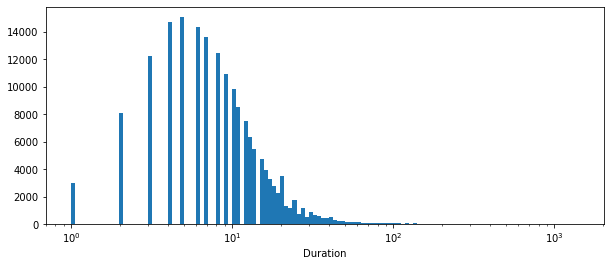

In [33]:
# Rescale the histogram according to IQR
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_c4['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 4])
plt.hist(data = df_c4, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlabel('Duration')

In [34]:
# Create a new column for duration bin
df_c4['duration_bins'] = df_c4['duration_min'].apply(lambda x: '<5 min' if 0<x<=5
                                                  else '5 min - 10 min' if 5<x<=10
                                                  else '10 min - 30 min' if 10<x<=30
                                                  else '30 min - 1hr' if 30<x<=60
                                                  else '1hr - 2hr' if 60<x<=120
                                                  else '2hr - 5hr' if 120<x<=600
                                                  else '>5hr')

Text(0, 0.5, 'Counts')

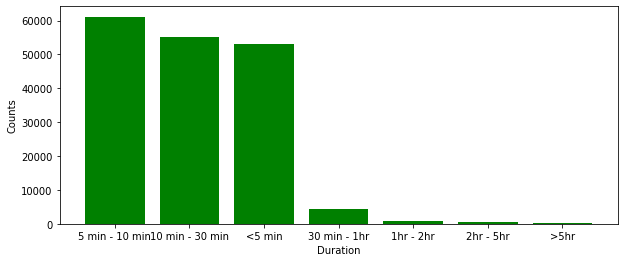

In [35]:
# plot bar graph and pie charts to check the distribution of durations
label=df_c4['duration_bins'].value_counts().index.tolist()
value=df_c4['duration_bins'].value_counts()
plt.rcParams['figure.figsize'] = 10, 4
plt.bar(label, value, color='green')
plt.xlabel("Duration")
plt.ylabel("Counts")


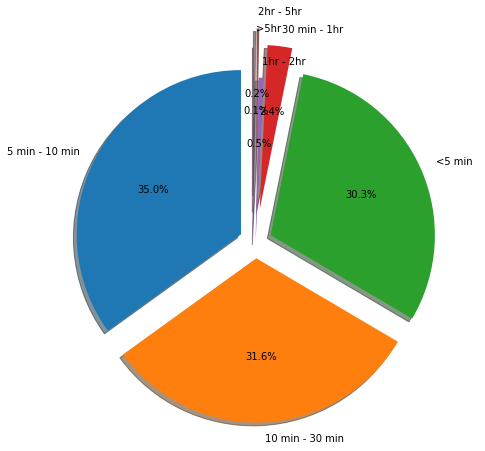

In [36]:
# plot bar graph and pie charts to check the distribution of durations
plt.rcParams['figure.figsize'] = 8, 8
explode = (0.1, 0.1, 0.1, 0.2, 0, 0.3, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
label=df_c4['duration_bins'].value_counts().index.tolist()
value=df_c4['duration_bins'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(value, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The average time for a trip is 11.2 minutes while the longest trip took 1402 minutes. Majority of trips took less than 10 minutes, there are similar number of in the bins "less than 5 minutes", "5 -10 mins " and "10-30 mins".

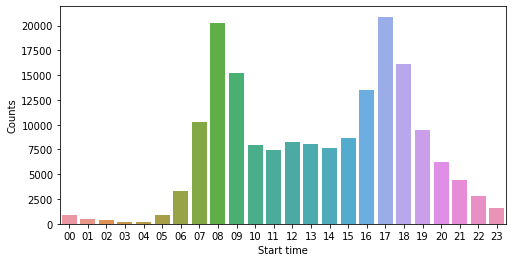

In [37]:
# When are most trips taken in terms of time of day

plt.rcParams['figure.figsize'] = 8, 4

sb.countplot(data=df_c4, x='Time of day');
plt.xlabel('Start time');
plt.ylabel('Counts');

8:00 and 17:00 are the time with the most trips

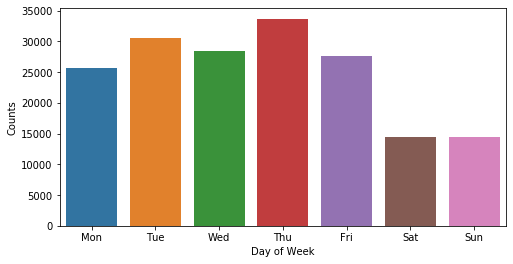

In [38]:
# When are most trips taken in terms of day of week

weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
wkOrder = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_c4['Weekday'] = df_c4['Weekday'].astype(wkOrder)
weekdayLabel = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)


sb.countplot(data=df_c4, x='Weekday');
plt.xlabel('Day of Week');
plt.ylabel('Counts');

Thursday is the day with the highest number pf trips, followed by Tuesday. Weekends have the least number of trips.

In [39]:
## When are most trips taken in terms of month of the years?
#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#MonthOrder = pd.api.types.CategoricalDtype(ordered=True, categories=months)
#df_c4['Month'] = df_c4['Month'].astype(MonthOrder)

#sb.countplot(data=df_c4, x='Month')
#plt.xticks(rotation=45);
#plt.xlabel('Month')
#plt.ylabel('Counts')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? If so, why did you do this?
The average time for a trip is 11.2 minutes while the longest trip took 1402 minutes. However, majority of trips took less than 10 minutes. The distribution of duration in minutes is a skewed distribution that has a longer tail in the right section. 
I performed a log scaled transformation on the x-axis for histogram of duration, this makes it better to visualize the trends at large durations. Also, I added a column for duration_bins to bin duration data so that it is easier to see.

There are similar number of in the bins "less than 5 minutes", "5 -10 mins " and "10-30 mins".

As for starting time of the trip, 8:00 and 17:00 are the time with the most trips. Thursday is the day with the highest number pf trips, followed by Tuesday. Weekends have the least number of trips.


## Bivariate Exploration
Explore the impact of user type subscribers and customers.

Text(0.5, 0, 'Duration')

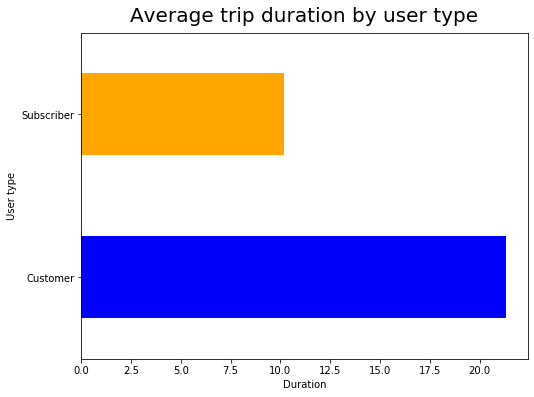

In [40]:
#plot the bar graph and violin plot for trip duration vs user types
colors=['blue', 'orange']
axis = df_c4.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=colors, figsize=(8,6))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type')
axis.set_xlabel('Duration')

In [41]:
#crop out the tail to better visualize the violin plot
df_c5=df_c4.copy()
df_c5.duration_min=df_c5.duration_min.astype('int')
df_c5=df_c5[df_c5['duration_min']<=100]


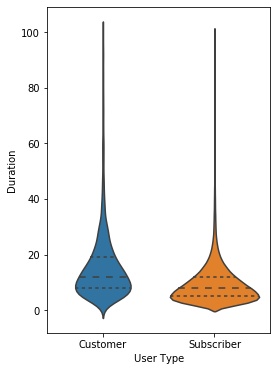

In [42]:
plt.rcParams['figure.figsize'] = 4, 6
sb.violinplot(data=df_c5, x='user_type', y='duration_min',inner='quartile' );
plt.xlabel('User Type');
plt.ylabel('Duration');

Customers have almost two times the duration compared to subsribers.

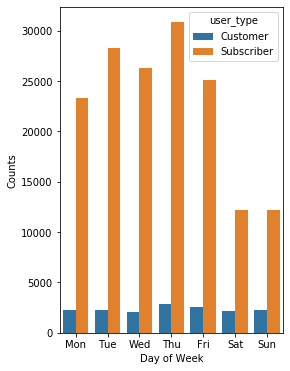

In [43]:
# weekdays and user type
sb.countplot(data=df_c4, x='Weekday', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Counts');

There is a greater variation of usage for subscribers compared to customers. Also, subscriber has much higher usage all the time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The trend for subscribers usage of bike over a week is highly similar to that of total usage. There is a greater variation of usage for subscribers compared to customers, while customers have a more stable trend across the wekk. Also, subscriber has much higher usage consistently over the time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Despite subsribers has a much higher number of trips across the weeks, customer has a longer duration for bike usage.¶

## Multivariate Exploration¶


How does the trip vary during different hours of weekdays?

Text(0.5, 0.98, 'Number of trips at different hours for days of week')

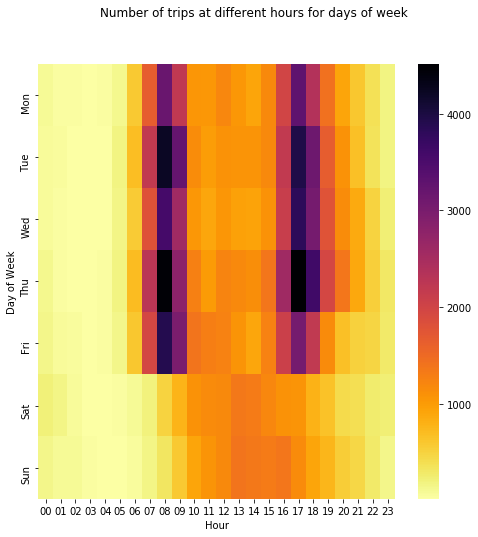

In [44]:
# heat map for trips at differnt hours of a day

plt.rcParams['figure.figsize'] = 8,8
hm = df_c4.groupby(['Weekday', 'Time of day']).size()
hm = hm.reset_index(name='count')
hm = hm.pivot(index='Weekday', columns='Time of day', values='count')
sb.heatmap(hm, cmap='inferno_r');
plt.xlabel('Hour');
plt.ylabel('Day of Week');
plt.suptitle('Number of trips at different hours for days of week')

There are two time span with high usage of bikes, which are 7:00-9:00 and 16:00 - 18:00 from Monday to Friday. However, for week ends, the usage reduce significantly. Also, there is moderate but consistend bike usage from 10:00 to 15:00 everyday throughout the week.

Text(0.5, 0.98, 'Number of trips at different hours for days of week')

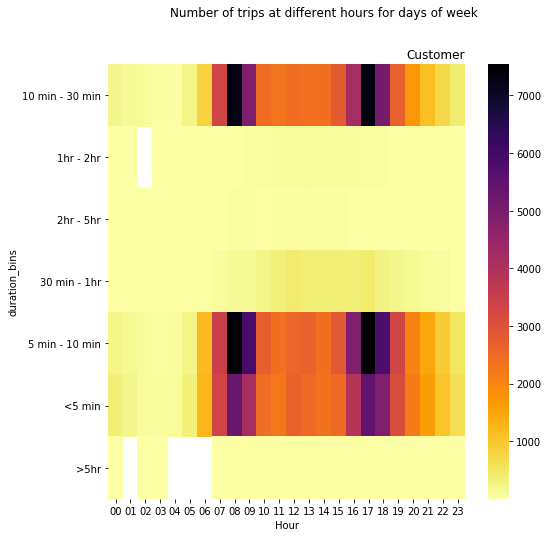

In [45]:
# heat map for durations at differnt hours of a day

plt.rcParams['figure.figsize'] = 8,8
hm = df_c4.groupby(['duration_bins', 'Time of day']).size()
hm = hm.reset_index(name='count')
hm = hm.pivot(index='duration_bins', columns='Time of day', values='count')
sb.heatmap(hm, cmap='inferno_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour');
plt.ylabel('duration_bins');
plt.suptitle('Number of trips at different hours for days of week')

There are many trips that is at the duration  below 30 mins occured at the two peak hour of day, 7:00-9:00 and 16:00 - 18:00. Not many trips for any durations from 0:00 - 5:00.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The multivariate exploration strengthened some finding in previous part, for example,the two time spans with high usage of bikes, which are 7:00-9:00 and 16:00 - 18:00, have been found in previoust analysis as well.
However, this is only valid from Monday to Friday. The multivairate analysis showed that for week ends, the usage reduce significantly at those two time spans. Also, there is moderate but consistend bike usage from 10:00 to 15:00 everyday throughout the week, which was not found in previous analsis.

### Were there any interesting or surprising interactions between features?
There are many trips that is at the duration below 30 mins occured at the two peak hour of day, 7:00-9:00 and 16:00 - 18:00. Not many trips for any durations from 0:00 - 5:00. This tells us that the peak hours trips are mostly short trips, while longer trips, such as 2hr-5hr trips, occurs constantly throughtout the day regardless of time.